<header>
    <h1>CA4010 - Data warehousing and Data mining</h1>
    <h2>Continuous assessment project</h2>
</header>
<p>
    For this project, we want to predict if a project submitted to 
    <a href="https://www.indiegogo.com">indiegogo.com</a> will or will not be funded.
    For this purpose, we'll use a
    <a href="https://www.kaggle.com/kingburrito666/indiegogo-project-statistics/data">
    dataset from kaggle containing one year of indiegogo projects.</a>
        The version used here is the version cleaned in part 1.
</p>
<p>
    This notebook will decribe our analysis of data dispersion
</p>

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
indiegogo = pd.read_csv('indiegogo_cleaned_dataset.tsv', sep='\t')

<h2>IQR and boxplots</h2>
<p>Let's analyze the collected percentage by category for projects with and without partnership. We're expecting to find more projects with very high collected percentages in the projects having a partnership as it should increase the visibility and popularity of the project.</p>

In [4]:
indiegogo['is_funded'] = indiegogo.collected_percentage.apply(lambda x: True if x >= 100 else False)

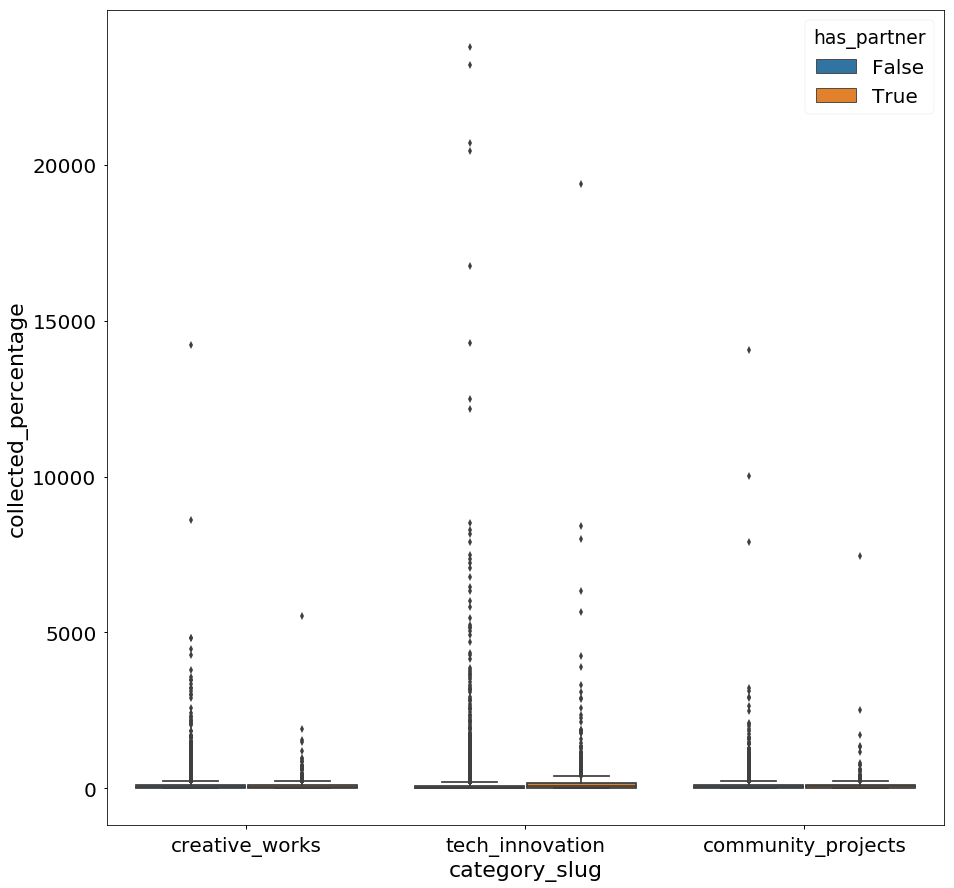

In [7]:
with sns.plotting_context("notebook", font_scale=2):
    plt.figure(figsize=(15, 15))
    ax = sns.boxplot(x="category_slug", y="collected_percentage", hue="has_partner", data=indiegogo)

<p>We can see that our boxplots are very flat has some projects reach huge collected percentages. Even if the majority of the projects has low collected percentages, many projects reach 1000% and more. although this is not very surprising, we'll have to take these extreme value into account for the rest of our experiment. We could remove them or set the value above 100% to 100% but doing that we'll lost very important information about the most successful projects and we don't want that. We can also see that surprinsigly, partnership doesn't seems to influence the collected percentage of the projects.</p>

<p>Let's analyze the dispersion of the targeted amount values. We think that we'll have some extreme values for very big projects, most of them in tech innovation and creative works as films or high tech materials often require high budget.</p>

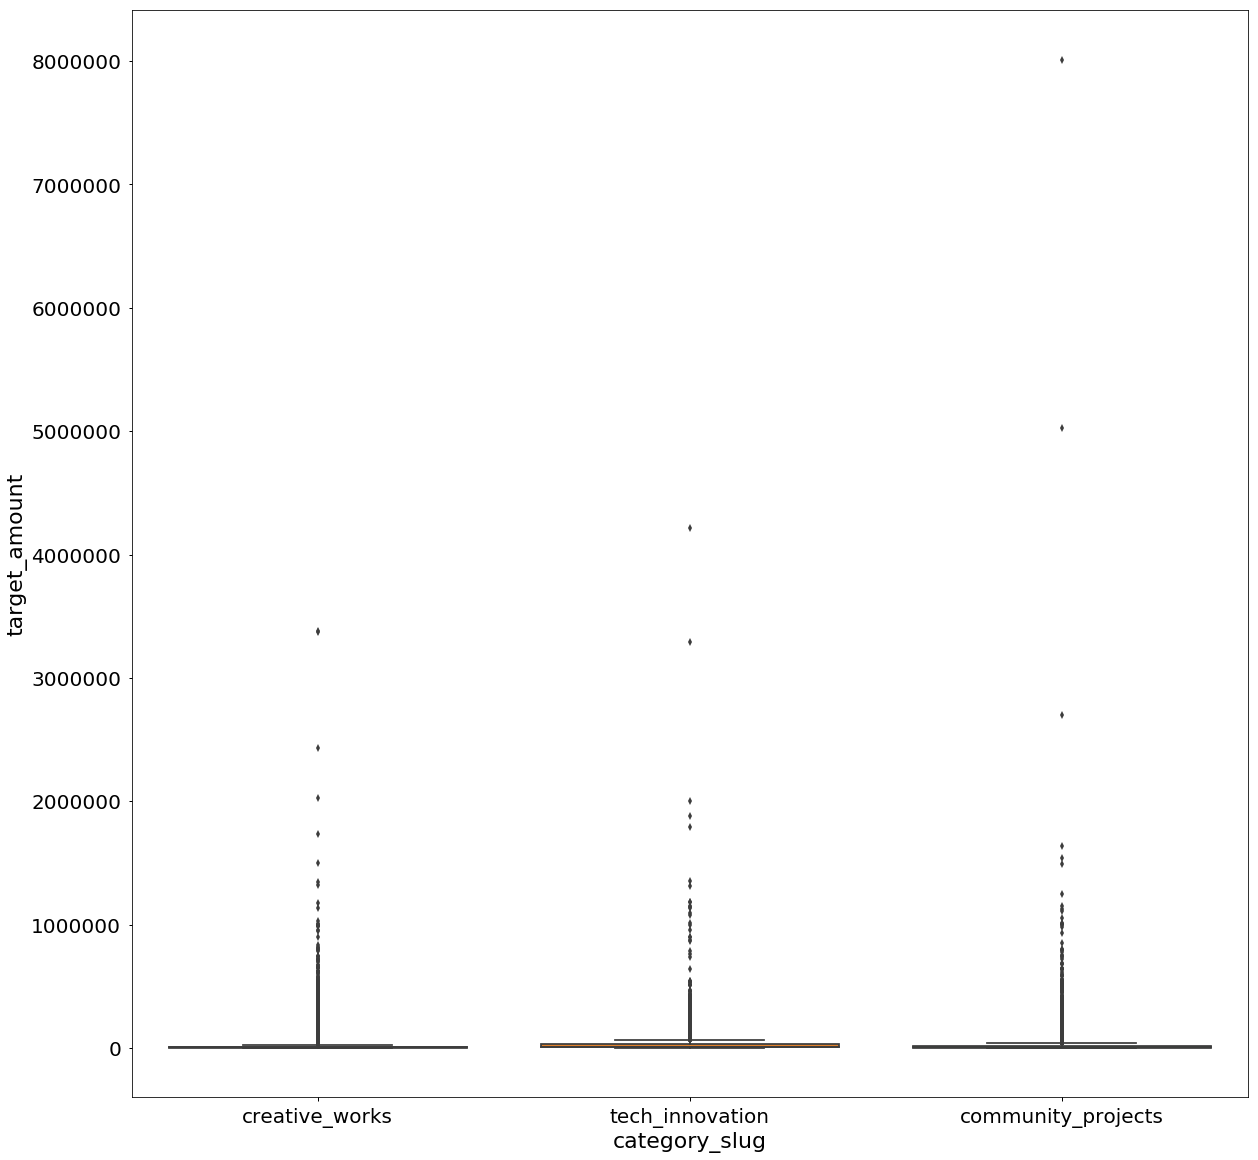

In [5]:
with sns.plotting_context("notebook", font_scale=2):
    plt.figure(figsize=(20, 20))
    ax = sns.boxplot(x="category_slug", y="target_amount", data=indiegogo) 

<p>Once again we have flat boxplots with extreme values for several projects. In fact these values are even more extreme than expected: some projects ask for millions of USD ! Surprisingly some community projects ask for even higher amount than creative works or tech innovation.</p>

<p>Let's now analyze if having a partnership impact the amount requested. We are expecting to find higher amount required for projects with a partnership as they are probably bigger projects.</p>

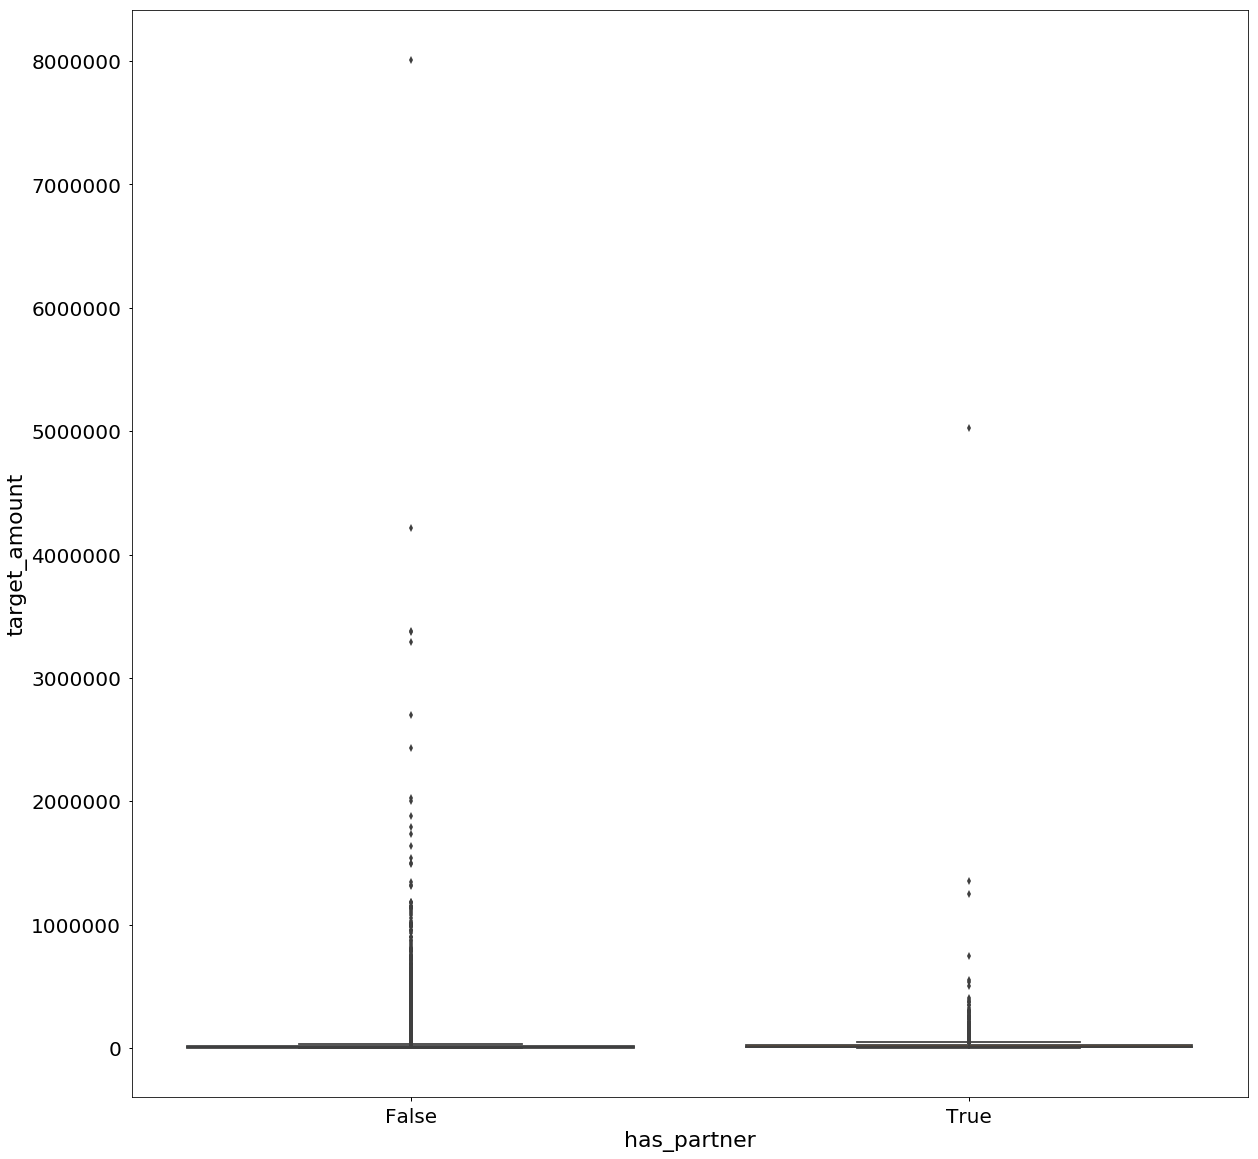

In [7]:
with sns.plotting_context("notebook", font_scale=2):
    plt.figure(figsize=(20, 20))
    ax = sns.boxplot(x="has_partner", y="target_amount", data=indiegogo) 

<p>Once again our dataset surprised us showing that many projects without partnership have very high target amounts. Let's see if the pledges also contains extreme values and if a partnership impact on this value. We are expecting to find extreme high values in all categories and higher ones for projects with a partnership as it should increase its popularity.</p>

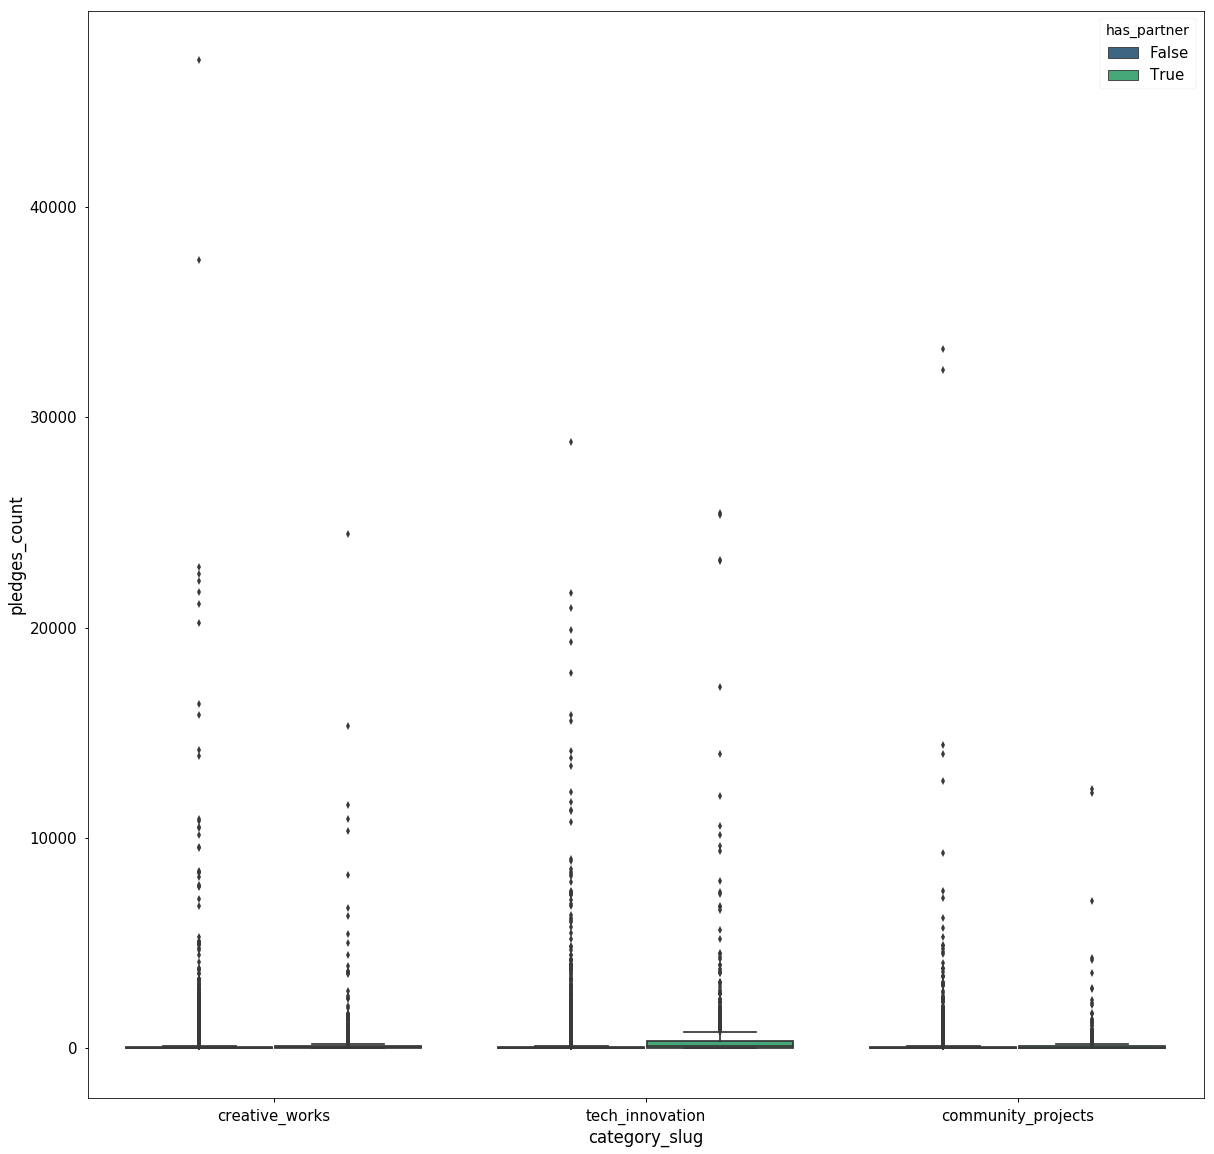

In [6]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(20, 20))
    ax = sns.boxplot(y="pledges_count", x="category_slug", data=indiegogo, hue="has_partner", palette="viridis")

<p>Once again we can see that a majority of projects doesn't have very high participation but severals are very populars. Surprisingly, a partnership doesn't seems to influence it at all, as for the target amount.</p>

<h2>Standard deviation</h2>
<p>As the boxplots show us, we have lots of extreme values for several of our attributes and thus, we are expecting to find very high scores of standard deviation for all our attributes excepted title and tagline len</p>

In [8]:
indiegogo.drop(['has_partner', 'is_funded'], axis=1).std(axis=0).to_frame(name="standard_deviation")

,standard_deviation
title_len,15.009397
tagline_len,37.775453
pledges_count,435.767772
collected_percentage,216.723190
target_amount,52880.788987


<p>As expected our standard deviation scores are very high, particularly for the target amount. title and tagline len are also higher than expected. Let's see the distribution of the title len</p>

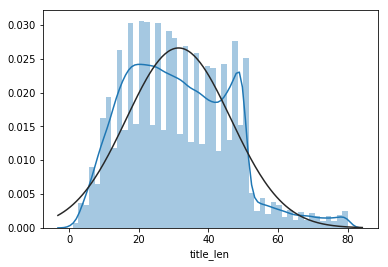

In [11]:
from scipy.stats import norm
sns.distplot(indiegogo.title_len, fit=norm)

<p>Most of the people are limiting their titles len to 50 characters, which is probably the longest string which can be displayed on indiegogo website. Few projects have very short titles with less than 10 characters, which is very few for a title. What about the tagline ?</p>

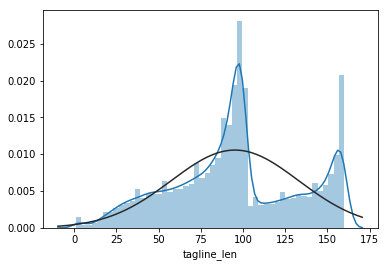

In [12]:
sns.distplot(indiegogo.tagline_len, fit=norm)

<p>The tagline is oddly distributed with 2 peaks: one at 100 characters and the other at 160. The tagline seems to be limited at 160 characters as no projects have a bigger tagline. Let's analyze the pledge count. As we have seen before, there are many extreme values for this attribute and the chart will probably be difficult to read</p>

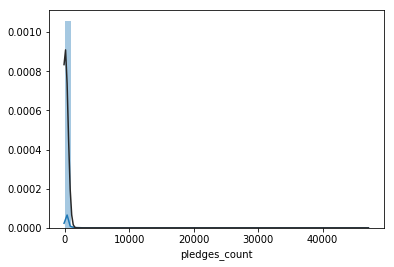

In [13]:
sns.distplot(indiegogo.pledges_count, fit=norm)

<p>As expected, we can scarcely see what happens here as few projects continue the curve for higher values, given the illusion of a flat line. Let's see the distribution of projects with lower pledges count. We're expecting to see lots of projects number decreasing as the pledges count increase.</p>

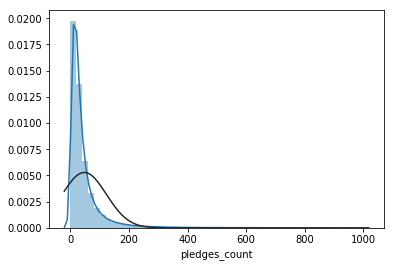

In [14]:
sns.distplot(indiegogo[indiegogo.pledges_count <= 1000].pledges_count, fit=norm)

<p>Here we can see that our values are skewed with high number of projects having low pledges count and gradually decreasing when the pledges count increase. Let's anayze the collected percentage. We'll probably have the same kind of problem to visualize it correclty.</p>

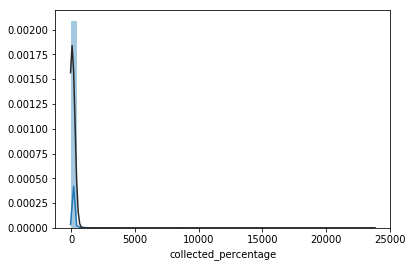

In [13]:
sns.distplot(indiegogo.collected_percentage, fit=norm)

<p>As expected, this chart is not very readable, let's detail the distribution of the projects having less than 500% of collected percentage.</p>

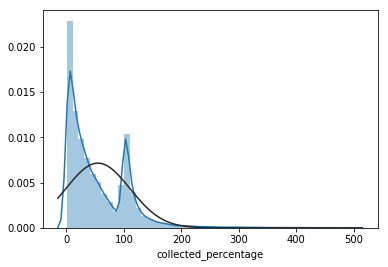

In [15]:
sns.distplot(indiegogo[indiegogo.collected_percentage < 500].collected_percentage, fit=norm)

<p>We can see that a big majority if the projects have 0% of collected percentages and their number gradually decrease as the percentage increase. However, there is a second peak around 100%, as some projects reached the target amount they had planned. However, after 100%, the number of projects very quickly decrease. What about the target amount ?</p>

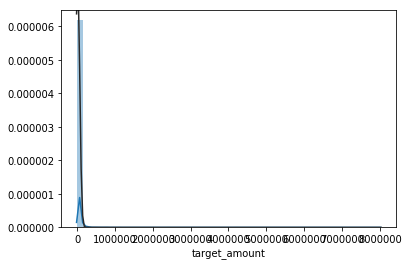

In [15]:
sns.distplot(indiegogo.target_amount, fit=norm)

<p>This chart is not very readable either, let's detail the distribution of the projects having less than 100000 USD as target amount.</p>

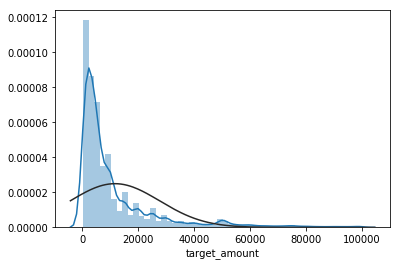

In [18]:
sns.distplot(indiegogo[indiegogo.target_amount < 100000].target_amount, fit=norm)

<p>We can see that most of the projects require low amount of money (less than 10000 USD).</p>

<h2>Conclusion</h2>
<p>We have seen that none of our attributes has a normal distribution. Most of them contains extremly high values for few projects and are positively skewed. We'll have to choose carefully our algorithm for the following experiments and avoid using algorithm which take mean or median values as something reprensentative of our dataset as well as those based on maximum values.</p>